# Import librairies & data

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import matplotlib.colors as mcolors
import plotly.express as px


In [2]:
df = pd.read_csv("bench.csv")
df['lookahead'] = df['lookahead'].fillna(0).astype(int)
df_group = df.groupby(['m', 'n', 'k', 'b', 'p', 'q', 'algo', 'lookahead']).agg({'gflops': 'mean'}).reset_index()

In [3]:
print("Shape:", df_group.shape)
df_group.head()

Shape: (810, 9)


,m,n,k,b,p,q,algo,lookahead,gflops
0,512,512,512,128,1,1,bcast,8,9.903908
1,512,512,512,128,1,1,p2p,8,11.825650
2,512,512,512,128,1,1,p2p-i-la,1,10.092977
3,512,512,512,128,1,1,p2p-i-la,2,9.677004
4,512,512,512,128,1,1,p2p-i-la,3,8.801812


# Exploration de bench.csv

In [4]:
print(set(df_group['m']))
print(set(df_group['n']))
print(set(df_group['k']))
print('--------------------')
print(set(df_group['b']))
print('--------------------')
print(set(df_group['p']))
print(set(df_group['q']))
print('--------------------')
print(set(df_group['lookahead']))
print(set(df_group['algo']))


{512, 1024, 3072, 2048, 1536, 4096, 6144}
{512, 1024, 3072, 2048, 1536, 4096, 6144}
{512, 1024, 3072, 2048, 1536, 4096, 6144}
--------------------
{128, 256, 512}
--------------------
{1, 2, 4}
{1, 2, 4}
--------------------
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{'p2p', 'bcast', 'p2p-i-la'}


# Analyse lookahead

In [87]:
df_p2p_i_la = df_group[df_group['algo'].str.contains('la')]
df_p2p_i_la_filtered = df_p2p_i_la.query('p == 2').query('q == 2')

In [88]:
cmap = plt.cm.get_cmap('plasma', 12)
colors = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]

In [89]:
plotly.plot(df_p2p_i_la_filtered.query('b == 256').sort_values(['n', 'p', 'q', 'lookahead']), kind = 'line', x =  'n', y = 'gflops', color = 'lookahead', markers = True, color_discrete_sequence=colors, title = 'Glops en fonction de n pour différent lookahead') #, facet_col="p", facet_row="q")

In [93]:
plotly.plot(df_p2p_i_la_filtered, kind = 'line', x =  'lookahead', y = 'gflops', height = 800, color = 'n', facet_row = 'b', markers = True, title = 'Glops en fonction du paramètre lookahead pour différentes valeurs de b et avec q = p = 2')

## trouver best lookahead pour chaque combinaison

In [23]:
idx_max = df_p2p_i_la.groupby(['m', 'n', 'k', 'b', 'p', 'q'])['gflops'].idxmax()
df_p2p_i_la_max = df_group.loc[idx_max]
df_others = df_group[df_group['algo'] != 'p2p-i-la']
df_filtered_best_lookahead = pd.concat([df_others, df_p2p_i_la_max], ignore_index=True)

In [72]:

fig = px.density_heatmap(
    df_p2p_i_la_max.query('b == 512 and n == 6144'),
    x='p',
    y='q',
    z='lookahead',
    text_auto=True,
    color_continuous_scale='Viridis', 
    title='Heatmap du meilleur lookahead pour b=512, n=6144 selon différentes valeurs de p et de q'
)

fig.update_layout(
    xaxis_title="p",
    yaxis_title="q"
)

fig.show()


# Analyse de b

## p = q = 1

In [45]:
df_p_1 = df_filtered_best_lookahead.sort_values(["m", "b", "p", "q"]).query('p == 1').query('q == 1')

In [81]:
plotly.plot(df_p_1, kind = 'line', markers = True, x = 'n', y = 'gflops', color ='algo', facet_col = 'b', width = 1400, title = 'Gflops en fonction de la taille du problème pour différentes valeurs de b et pour différents algorithmes, p = q = 1').update_xaxes(matches=None)

## p = q = 2

In [54]:
df_p_2 = df_filtered_best_lookahead.sort_values(["m", "b", "p", "q"]).query('p == 2').query('q == 2')

In [83]:
plotly.plot(df_p_2, kind = 'line', markers = True, x = 'n', y = 'gflops', color ='algo', facet_col = 'b', width = 1400, title = 'Gflops en fonction de la taille du problème pour différentes valeurs de b et pour différents algorithmes, p = q = 2').update_xaxes(matches=None)

## p = q = 4

In [56]:
df_p_4 = df_filtered_best_lookahead.sort_values(["m", "b", "p", "q"]).query('p == 4').query('q == 4')

In [84]:
plotly.plot(df_p_4, kind = 'line', markers = True, x = 'n', y = 'gflops', color ='algo', facet_col = 'b', width = 1400, title = 'Gflops en fonction de la taille du problème pour différentes valeurs de b et pour différents algorithmes, p = q = 4').update_xaxes(matches=None)

## p = 1 et q = 2

In [73]:
df_p1_q2 = df_filtered_best_lookahead.sort_values(["m", "b", "p", "q"]).query('p == 1').query('q == 2')

In [85]:
plotly.plot(df_p1_q2, kind = 'line', markers = True, x = 'n', y = 'gflops', color ='algo', facet_col = 'b', width = 1400, title = 'Gflops en fonction de la taille du problème pour différentes valeurs de b et pour différents algorithmes, p = 1 et q = 2').update_xaxes(matches=None)

# Analyse de m/n/k

In [ ]:
## à refaire j'aime bien cette vise
plt.figure(figsize=(10, 6))
sns.boxplot(x='b', y='gflops', hue='algo', data=df)
plt.title("Influence de b et algo sur les GFLOPS")
plt.tight_layout()
plt.show()

# plot besbes

In [9]:
sns.set(style="whitegrid")
params = ['m', 'n', 'k', 'b', 'p', 'q', 'lookahead']

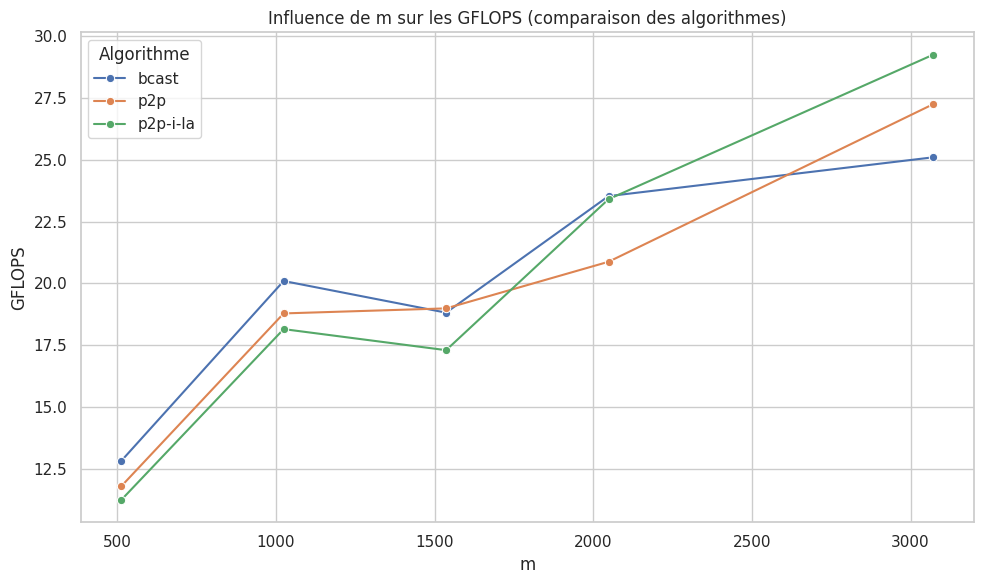

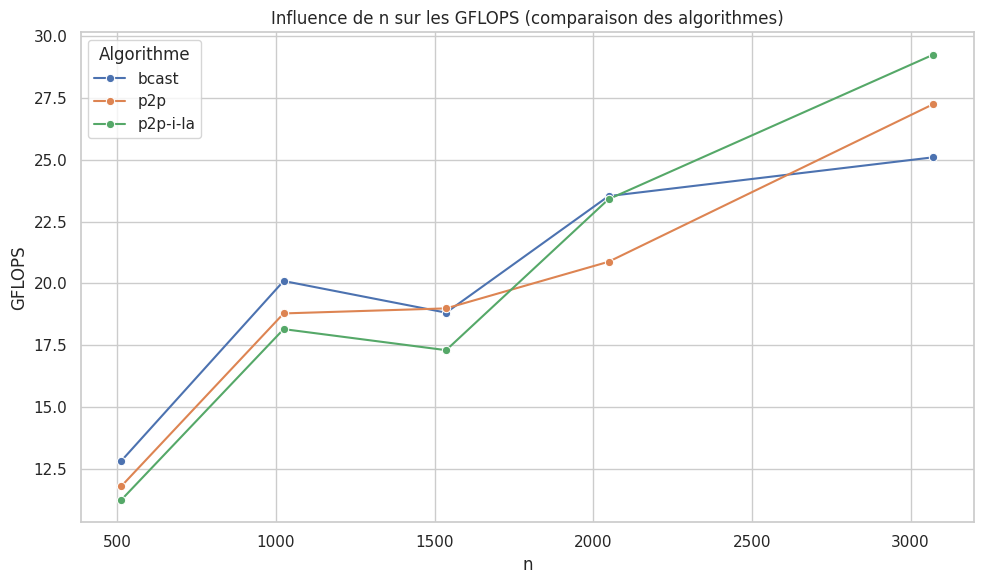

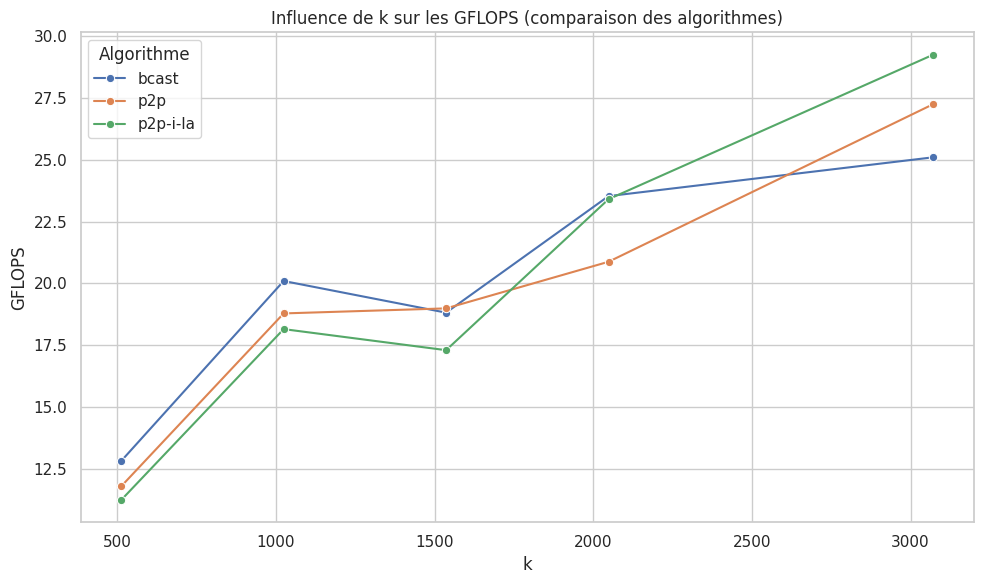

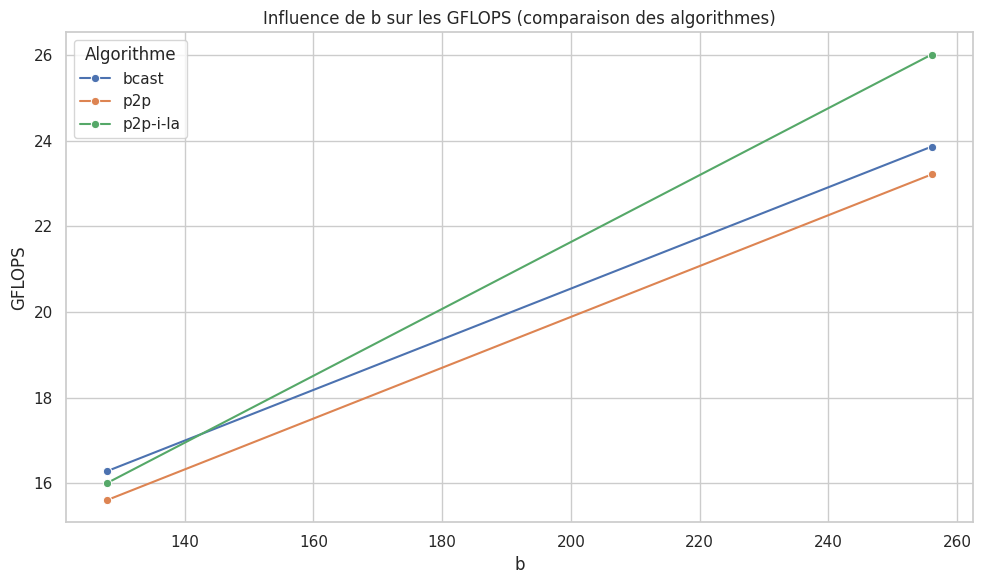

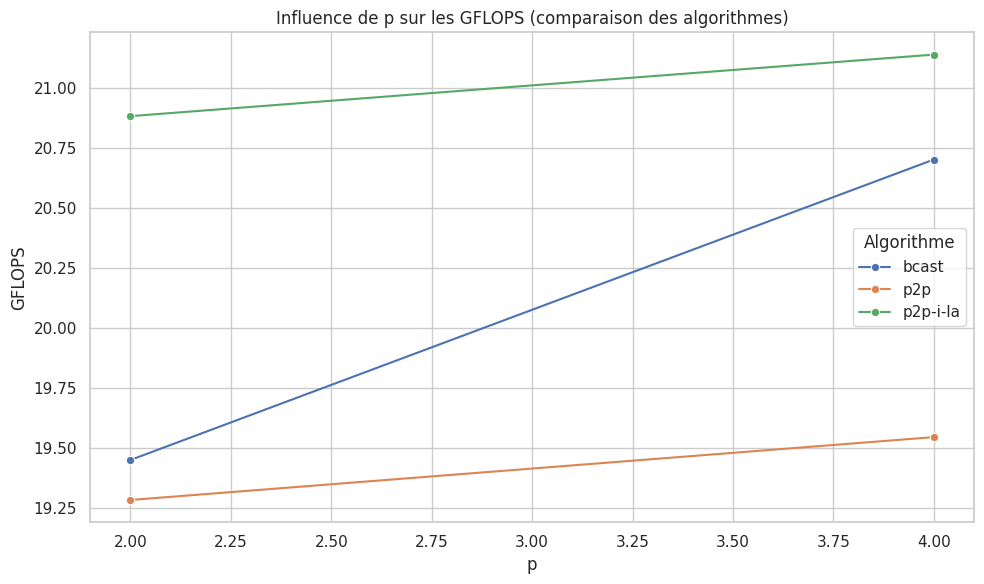

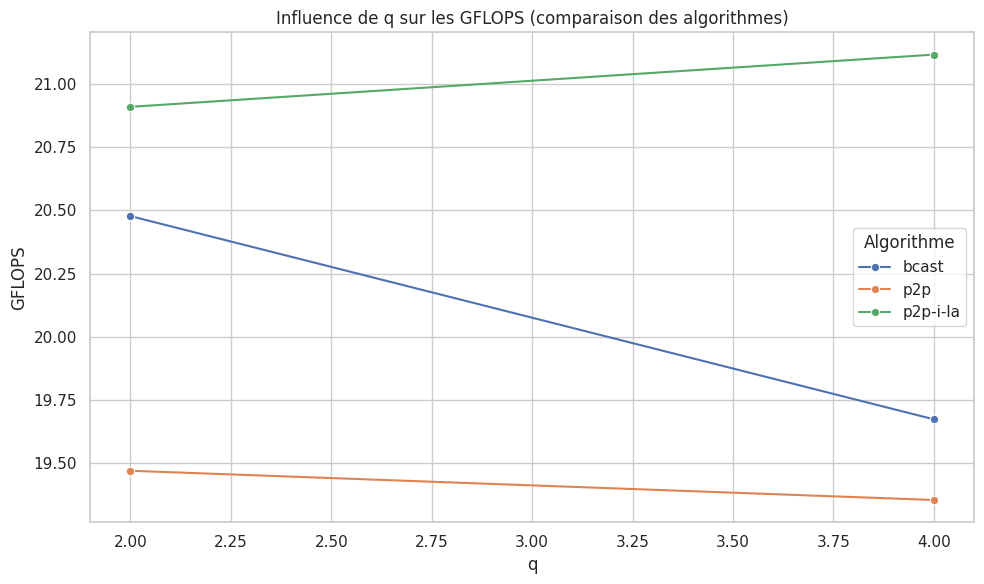

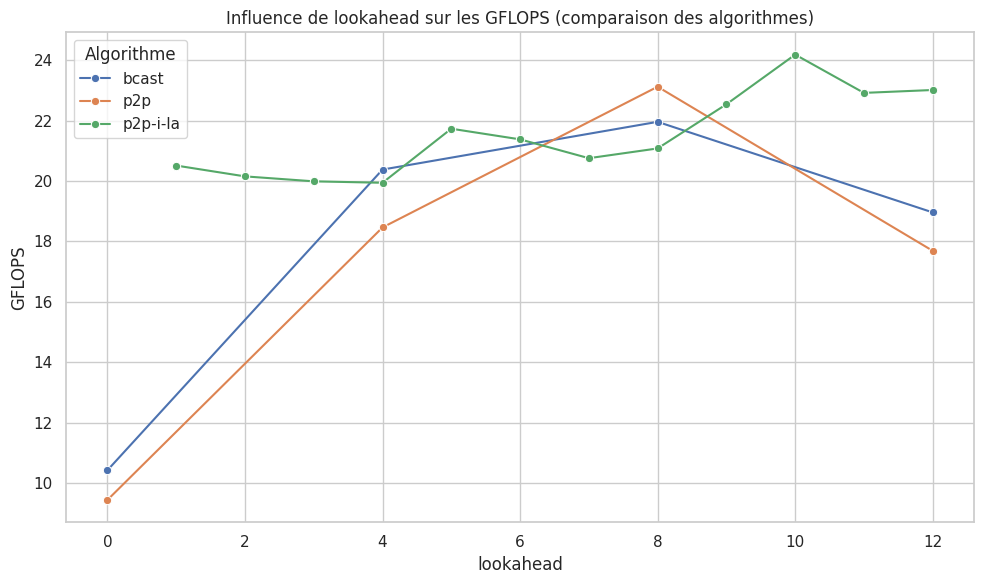

In [8]:
# Pour chaque paramètre, tracer la courbe gflops vs paramètre pour chaque algo
for param in params:
    plt.figure(figsize=(10, 6))
    # Moyenne pour lisser les courbes si plusieurs mesures par point
    df_group = df.groupby([param, 'algo'], as_index=False)['gflops'].mean()
    sns.lineplot(data=df_group, x=param, y='gflops', hue='algo', marker='o')
    plt.title(f"Influence de {param} sur les GFLOPS (comparaison des algorithmes)")
    plt.xlabel(param)
    plt.ylabel("GFLOPS")
    plt.legend(title="Algorithme")
    plt.tight_layout()
    plt.show()

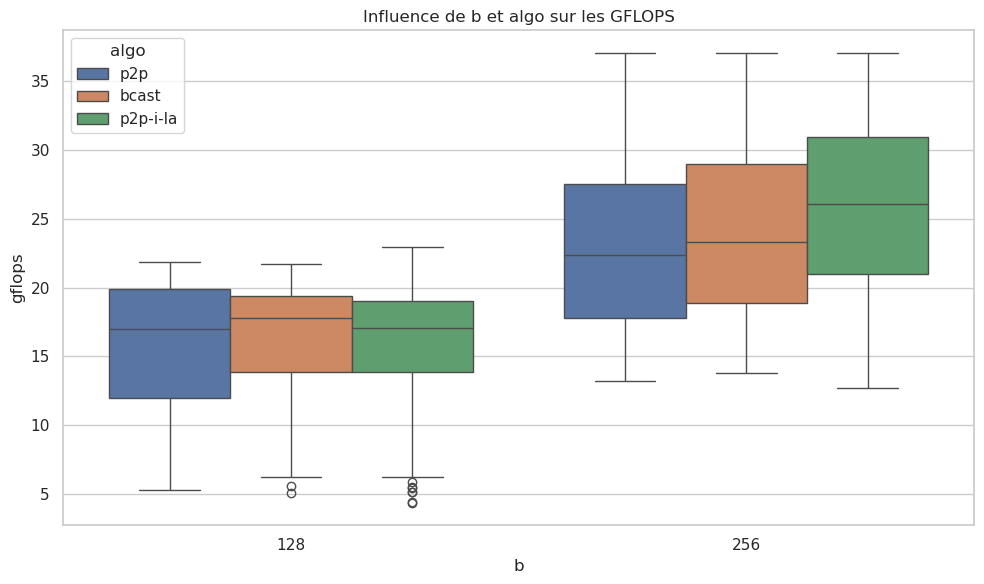

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='b', y='gflops', hue='algo', data=df)
plt.title("Influence de b et algo sur les GFLOPS")
plt.tight_layout()
plt.show()

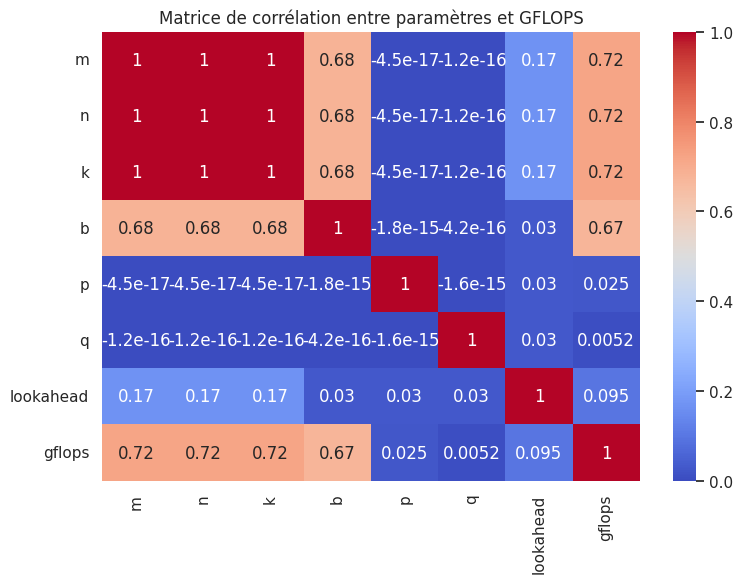

In [10]:
# Corrélation entre les paramètres et les performances
corr = df[params + ['gflops']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre paramètres et GFLOPS")
plt.tight_layout()
plt.show()